<a href="https://colab.research.google.com/github/jslee464/diabetic-retinopathy/blob/main/DR_LogisticRegression_2_labels_%EC%8B%A4%EC%A0%9C%EC%A0%81%EC%9A%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/yjun20/machinelearning

%cd machinelearning/new

Cloning into 'machinelearning'...
remote: Enumerating objects: 1602, done.
remote: Counting objects: 100% (199/199), done.
remote: Compressing objects: 100% (199/199), done.
remote: Total 1602 (delta 2), reused 193 (delta 0), pack-reused 1403
Receiving objects: 100% (1602/1602), 143.71 MiB | 19.05 MiB/s, done.
Resolving deltas: 100% (15/15), done.
Updating files: 100% (1545/1545), done.
/content/machinelearning/new


In [2]:
class_names=list(range(2))
print(class_names)

[0, 1]


In [3]:
import os
# 학습 이미지 확인하기
train_list = []

for label in class_names:
    file_list = os.listdir(str(label))
    #파일 경로
    for file_name in file_list:
        path =  str(label) + "/" + file_name
        train_list.append((path, label))

In [4]:
train_list

[('0/5bf3357a2823.png', 0),
 ('0/1ab8d3431ffc.png', 0),
 ('0/4bcee3cbe232.png', 0),
 ('0/6bf2a81a5d91.png', 0),
 ('0/18b99159a14f.png', 0),
 ('0/53ddae6a619e.png', 0),
 ('0/76cb010f7aa0.png', 0),
 ('0/1df1530b9b8d.png', 0),
 ('0/11d8e5eaee5b.png', 0),
 ('0/384e6c915722.png', 0),
 ('0/6dc07f968794.png', 0),
 ('0/41ab357d103f.png', 0),
 ('0/60aa4e649abf.png', 0),
 ('0/4e8585a96739.png', 0),
 ('0/3a4cfea0a766.png', 0),
 ('0/26cd40b57ad1.png', 0),
 ('0/1e036f2e7095.png', 0),
 ('0/7f2123bc89a3.png', 0),
 ('0/83d81ba5959c.png', 0),
 ('0/276b14f72328.png', 0),
 ('0/201f882365d3.png', 0),
 ('0/0f364b7d4384.png', 0),
 ('0/596f4fdb0004.png', 0),
 ('0/1df0a4c23c95.png', 0),
 ('0/93a1b984de84.png', 0),
 ('0/73ba798fee25.png', 0),
 ('0/94f9ecf4b8d2.png', 0),
 ('0/8ab3faa3701f.png', 0),
 ('0/69b3a00927fc.png', 0),
 ('0/4d17559ac1e2.png', 0),
 ('0/6e0f78e188ff.png', 0),
 ('0/1faf8664816c.png', 0),
 ('0/484dbeb9bf2a.png', 0),
 ('0/351e842842a2.png', 0),
 ('0/2da82d14e1b7.png', 0),
 ('0/15b21c80cc31.pn

In [5]:
import pandas as pd

train_dataframe = pd.DataFrame(data=train_list, columns=["path", "label"])

print('학습 이미지의 개수:', len(train_dataframe))
print('학습 이미지별 클래스 정보')
train_dataframe.head()

학습 이미지의 개수: 1544
학습 이미지별 클래스 정보


,path,label
0,0/5bf3357a2823.png,0
1,0/1ab8d3431ffc.png,0
2,0/4bcee3cbe232.png,0
3,0/6bf2a81a5d91.png,0
4,0/18b99159a14f.png,0


클래스 0의 개수: 772
클래스 1의 개수: 772
클래스 2의 개수: 0
클래스 3의 개수: 0
클래스 4의 개수: 0
클래스 5의 개수: 0


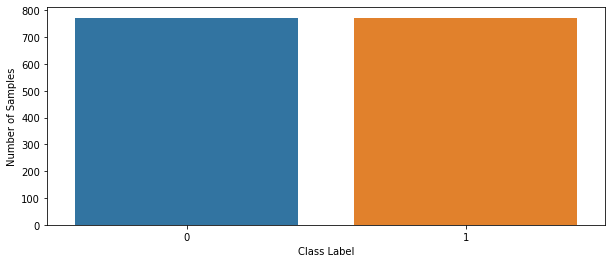

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (8.0, 6.0) # 그림의 기본 크기 설정

# 각 클래스별 개수 출력
print('클래스 0의 개수:', len(train_dataframe[train_dataframe.label == 0]))
print('클래스 1의 개수:', len(train_dataframe[train_dataframe.label == 1]))
print('클래스 2의 개수:', len(train_dataframe[train_dataframe.label == 2]))
print('클래스 3의 개수:', len(train_dataframe[train_dataframe.label == 3]))
print('클래스 4의 개수:', len(train_dataframe[train_dataframe.label == 4]))
print('클래스 5의 개수:', len(train_dataframe[train_dataframe.label == 5]))

# 각 클래스에 따른 학습 이미지의 개수를 출력하기
fig, ax = plt.subplots(figsize = (10, 4)) # 그림 크기 설정
sns.countplot(x ='label', data=train_dataframe)
plt.xlabel("Class Label")
plt.ylabel("Number of Samples")
plt.show() 

이미지의 해상도: (64, 64, 3)


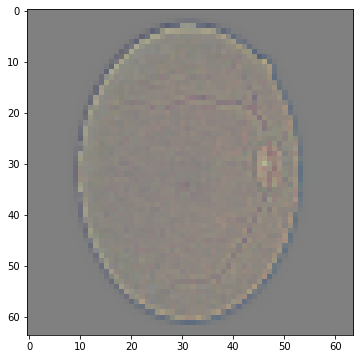

In [7]:
from skimage.transform import resize
from PIL import Image
import numpy as np


img = Image.open(train_dataframe.iloc[0].path)
img = np.asarray(img)
img = resize(img, (64, 64))
print('이미지의 해상도:', img.shape)

# 이미지 출력하기
plt.imshow(img, cmap="gray")
plt.show()

In [8]:
from sklearn.model_selection import train_test_split#비율에 맞게 나누어줌

train_dataset, test_dataset = train_test_split(train_dataframe, test_size=0.2)

print('학습 데이터셋 크기:', len(train_dataset))
print('테스트 데이터셋 크기:', len(test_dataset))

학습 데이터셋 크기: 1235
테스트 데이터셋 크기: 309


In [9]:
import time


######### 학습 데이터셋 #########
start_time = time.time() # 시작 시간

# 학습 데이터셋 구성하기
X_train = []
y_train = []

# 데이터 정보를 하나씩 확인하며
for index, row in train_dataset.iterrows():
    # 이미지 정보를 배열에 담기
    img = Image.open(row['path'])

    img = np.asarray(img)
    img = resize(img, (64, 64))
    X_train.append(img)
    y_train.append(row['label']) # 레이블 정보를 배열에 담기

X_train = np.asarray(X_train) # Numpy 객체로 변환
y_train = np.asarray(y_train) # Numpy 객체로 변환

print("소요된 시간(초 단위):", time.time() - start_time) # 실행 시간

소요된 시간(초 단위): 21.96485948562622


In [10]:
######### 테스트 데이터셋 #########
start_time = time.time() # 시작 시간

# 학습 데이터셋 구성하기
X_test = []
y_test = []

# 데이터 정보를 하나씩 확인하며
for index, row in test_dataset.iterrows():
    # 이미지 정보를 배열에 담기
    img = Image.open(row['path'])
    img = np.asarray(img)
    img = resize(img, (64, 64))
    X_test.append(img)
    y_test.append(row['label']) # 레이블 정보를 배열에 담기

X_test = np.asarray(X_test) # Numpy 객체로 변환
y_test = np.asarray(y_test) # Numpy 객체로 변환

print("소요된 시간(초 단위):", time.time() - start_time) # 실행 시간

소요된 시간(초 단위): 3.0161681175231934


In [11]:
print('학습 이미지:', X_train.shape)
print('학습 레이블:', y_train.shape)
print('테스트 이미지:', X_test.shape)
print('테스트 레이블:', y_test.shape)

학습 이미지: (1235, 64, 64, 3)
학습 레이블: (1235,)
테스트 이미지: (309, 64, 64, 3)
테스트 레이블: (309,)


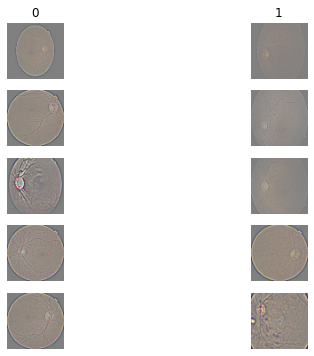

In [12]:
# 각 클래스마다 특정 개수의 이미지를 출력합니다.
samples_per_class = 5


# 데이터 시각화 함수 구현
def visualize_data(X_data, y_data, class_names, samples_per_class):
    num_classes = len(class_names)
    for y, cls in enumerate(class_names): # 각 클래스를 (클래스, 클래스명) 형식으로 순회
        idxs = np.flatnonzero(y_data == y) # 해당 클래스를 갖는(True 값을 갖는) 데이터 인덱스 계산
        idxs = np.random.choice(idxs, samples_per_class, replace=False) # 특정 개수만큼 무작위로 선택
        for i, idx in enumerate(idxs): # 하나씩 이미지를 확인하며
            plt_idx = i * num_classes + y + 1 # 이미지를 출력할 위치: 각 열(column)에 차례대로 출력하도록 설정
            plt.subplot(samples_per_class, num_classes, plt_idx)
            plt.imshow(X_data[idx], cmap="gray")
            plt.axis('off')
            if i == 0:
                plt.title(cls)
    plt.show()

visualize_data(X_train, y_train, class_names, samples_per_class)

In [13]:
# 데이터 전처리(preprocessing)를 통해 각 이미지를 벡터로 변경합니다.
X_train = np.reshape(X_train, (X_train.shape[0], -1))

X_test = np.reshape(X_test, (X_test.shape[0], -1))

In [14]:
print('학습 이미지:', X_train.shape)
print('학습 레이블:', y_train.shape)

print('테스트 이미지:', X_test.shape)
print('테스트 레이블:', y_test.shape)

학습 이미지: (1235, 12288)
학습 레이블: (1235,)
테스트 이미지: (309, 12288)
테스트 레이블: (309,)


Logistic Regression 이용한 모델 학습

In [15]:
from sklearn.model_selection import KFold
k_fold = KFold(n_splits=5, shuffle=True, random_state=1234) 
from sklearn.model_selection import cross_val_score

In [16]:
from sklearn.linear_model import LogisticRegression

start_time = time.time() # 시작 시간

model = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=100)

score = cross_val_score(model, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy')

print("소요된 시간(초 단위):", time.time() - start_time) # 실행 시간

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

소요된 시간(초 단위): 45.1273136138916


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
print(score)  #KFold 결괏값 accuracy 출력
print("점수 평균 : " + str(round(np.mean(score) * 100, 2)))

[0.93927126 0.92712551 0.95546559 0.94736842 0.95951417]
점수 평균 : 94.57


In [18]:
model.fit(X_train, y_train)  #model fit

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [19]:
prediction = model.predict(X_test)

In [20]:
prediction

array([1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,

In [21]:
y_test

array([1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, prediction, labels=model.classes_)

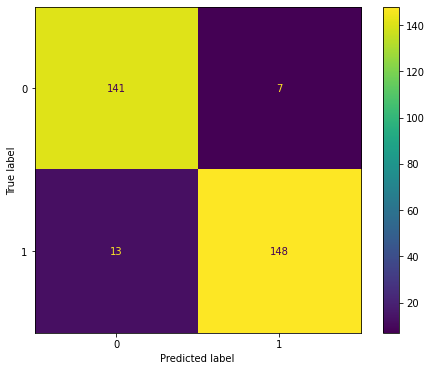

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay


disp = ConfusionMatrixDisplay(cm, 
                       display_labels = model.classes_)
disp.plot()
plt.show()

In [24]:
accuracy_score(y_test, prediction)

0.9352750809061489

In [25]:
prob = model.predict_proba(X_test) [: : , 1]
prob

array([8.66226909e-01, 9.99096773e-01, 1.52113900e-02, 8.99033124e-01,
       1.24283619e-01, 3.26695110e-03, 9.99758962e-01, 9.99547826e-01,
       9.41049011e-01, 9.96629810e-01, 9.98259836e-01, 9.98895400e-01,
       4.54704630e-02, 9.78168424e-03, 1.12444633e-02, 8.75806389e-01,
       9.99891430e-01, 9.82942222e-06, 4.48657472e-01, 9.99346002e-01,
       8.86622822e-01, 9.99545627e-01, 5.82812064e-01, 9.81198374e-01,
       9.56609272e-01, 9.68890208e-01, 9.97670785e-01, 9.98929589e-01,
       9.97737152e-01, 9.99571120e-01, 9.59927382e-01, 9.18581346e-01,
       9.96846488e-01, 6.27827524e-01, 1.84889494e-02, 9.99546364e-01,
       9.80721024e-01, 3.83898498e-03, 9.99724845e-01, 3.96855204e-02,
       9.75532064e-01, 9.96181879e-01, 2.95908042e-01, 3.29520286e-03,
       8.55922081e-01, 9.95418185e-01, 9.95446187e-01, 7.07207348e-11,
       9.91724827e-01, 9.98541869e-01, 9.98967606e-01, 9.98554613e-01,
       9.99206588e-01, 1.47649449e-01, 9.99022613e-01, 7.55352845e-02,
      

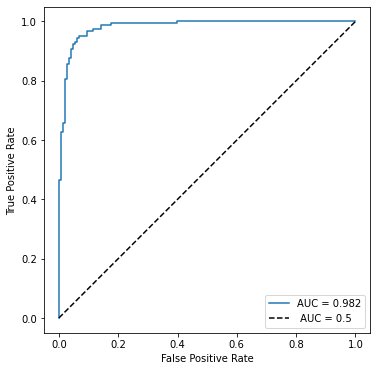

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics


fpr, tpr, thresholds = metrics.roc_curve(y_test, prob)
a = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label = f'AUC = {a:.3f}')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.plot([0, 1], [0, 1], "k--", label = " AUC = 0.5")
plt.axis("square")
plt.title('')
plt.legend(loc = 'lower right')
plt.show()

In [27]:
from sklearn.metrics import mean_squared_error 
mean_squared_error(y_test, prediction)

0.06472491909385113

In [28]:
!git clone https://github.com/jslee464/diabetic-retinopathy

%cd diabetic-retinopathy/dr

Cloning into 'diabetic-retinopathy'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 31 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (31/31), 1.74 MiB | 11.23 MiB/s, done.
/content/machinelearning/new/diabetic-retinopathy/dr


In [29]:
class_names=list(range(2))
print(class_names)

[0, 1]


In [30]:
import os
# 학습 이미지 확인하기
train_list = []

for label in class_names:
    file_list = os.listdir(str(label))
    #파일 경로
    for file_name in file_list:
        path =  str(label) + "/" + file_name
        train_list.append((path, label))
        

In [31]:
train_list

[('0/ex99.png', 0),
 ('1/ex1.png', 1),
 ('1/ex3.png', 1),
 ('1/ex5.png', 1),
 ('1/ex4.png', 1),
 ('1/ex2.png', 1)]

In [32]:
import pandas as pd

real_dataframe = pd.DataFrame(data=train_list, columns=["path", "label"])

print('학습 이미지의 개수:', len(real_dataframe))
print('학습 이미지별 클래스 정보')
real_dataframe.head()

학습 이미지의 개수: 6
학습 이미지별 클래스 정보


,path,label
0,0/ex99.png,0
1,1/ex1.png,1
2,1/ex3.png,1
3,1/ex5.png,1
4,1/ex4.png,1


클래스 0의 개수: 1
클래스 1의 개수: 5


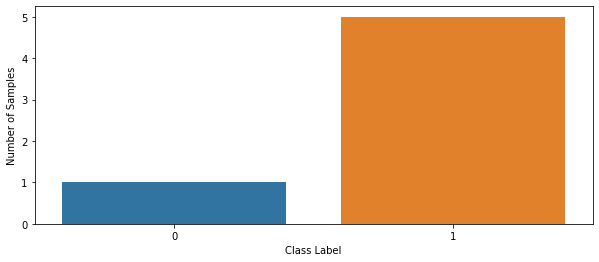

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (8.0, 6.0) # 그림의 기본 크기 설정

# 각 클래스별 개수 출력
print('클래스 0의 개수:', len(real_dataframe[real_dataframe.label == 0]))
print('클래스 1의 개수:', len(real_dataframe[real_dataframe.label == 1]))


# 각 클래스에 따른 학습 이미지의 개수를 출력하기
fig, ax = plt.subplots(figsize = (10, 4)) # 그림 크기 설정
sns.countplot(x ='label', data=real_dataframe)
plt.xlabel("Class Label")
plt.ylabel("Number of Samples")
plt.show() 

In [34]:
img = Image.open(real_dataframe.iloc[3].path)
img = np.asarray(img)
img.shape

(198, 255, 4)

이미지의 해상도: (64, 64, 3)


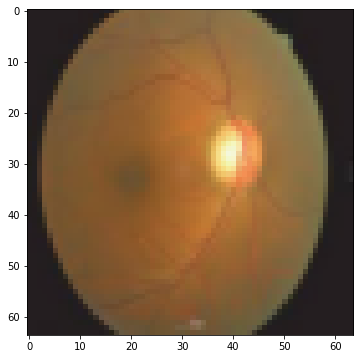

In [36]:
from skimage.transform import resize
from PIL import Image
import numpy as np

img = img[:,:,:3]
img = resize(img, (64, 64, 3))
print('이미지의 해상도:', img.shape)

# 이미지 출력하기
plt.imshow(img)
plt.show()

In [37]:
import time


######### 실제 데이터셋 #########
start_time = time.time() # 시작 시간

# 실제 데이터 
X_real = []
y_real = []

# 데이터 정보를 하나씩 확인하며
for index, row in real_dataframe.iterrows():
    # 이미지 정보를 배열에 담기
    img = Image.open(row['path'])

    img = np.asarray(img)
    img = img[:,:,:3]
    img = resize(img, (64, 64, 3))
    X_real.append(img)
    y_real.append(row['label']) # 레이블 정보를 배열에 담기

X_real = np.asarray(X_real) # Numpy 객체로 변환
y_real = np.asarray(y_real) # Numpy 객체로 변환

print("소요된 시간(초 단위):", time.time() - start_time) # 실행 시간

소요된 시간(초 단위): 0.327730655670166


In [38]:
print('학습 이미지:', X_real.shape)
print('학습 레이블:', y_real.shape)

학습 이미지: (6, 64, 64, 3)
학습 레이블: (6,)


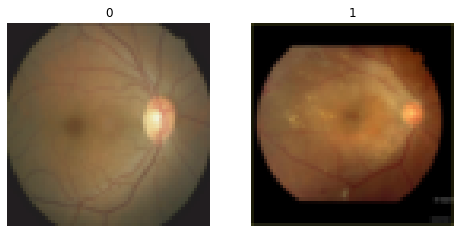

In [39]:
# 각 클래스마다 특정 개수의 이미지를 출력합니다.
samples_per_class = 1


# 데이터 시각화 함수 구현
def visualize_data(X_real, y_real, class_names, samples_per_class):
    num_classes = len(class_names)
    for y, cls in enumerate(class_names): # 각 클래스를 (클래스, 클래스명) 형식으로 순회
        idxs = np.flatnonzero(y_real == y) # 해당 클래스를 갖는(True 값을 갖는) 데이터 인덱스 계산
        idxs = np.random.choice(idxs, samples_per_class, replace=False) # 특정 개수만큼 무작위로 선택
        for i, idx in enumerate(idxs): # 하나씩 이미지를 확인하며
            plt_idx = i * num_classes + y + 1 # 이미지를 출력할 위치: 각 열(column)에 차례대로 출력하도록 설정
            plt.subplot(samples_per_class, num_classes, plt_idx)
            plt.imshow(X_real[idx], cmap="gray")
            plt.axis('off')
            if i == 0:
                plt.title(cls)
    plt.show()

visualize_data(X_real, y_real, class_names, samples_per_class)

In [40]:
# 데이터 전처리(preprocessing)를 통해 각 이미지를 벡터로 변경합니다.
X_real = np.reshape(X_real, (X_real.shape[0], -1))

실제 사례 분석

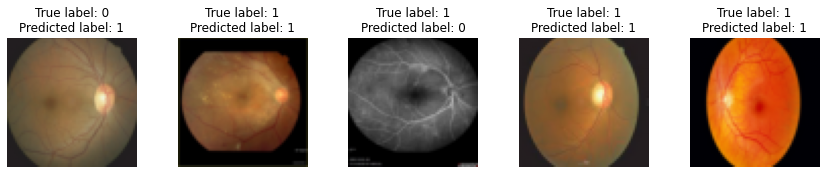

In [46]:

max_cnt = 4

# 이미지들이 들어갈 수 있는 그림(figure) 생성
fig, axes = plt.subplots(1, max_cnt)
fig.set_size_inches(12, 4)
fig.tight_layout()

for ax, image, label, pred in zip(axes, X_real[:max_cnt], y_real[:max_cnt], model.predict(X_real[:max_cnt])):
    ax.imshow(np.reshape(image, (64, 64, 3))) # 출력할 때는 이미지 해상도에 맞게 재변형
    ax.axis('off')
    ax.set_title(f'True label: {label}\nPredicted label: {pred}')
